## Data 

#### Data for the observations of 1000 forests consisting on:

+ leaf area index [lai]: a measure of forest structure that indicates how dense a forest is. The higher the value, the denser the forest. Values below 1 correspond to Woodlands, values above 1 describe actual forests, than can be divided into different classes (‘open forest’ ‘moderate dense forest’, ‘dense forest’ and ‘very dense forest’ with ascending leaf density. Typical values in Germany are around 3-6.
+ wetness: indicates how moist the soil is (values between 0% and 100%)
+ treeSpecies: describes the species of trees in the forest. Forests consist of pines or beech trees and mostly a mix of both
+ Sentinel_2A_{ABCD} columns with ABCD corresponding to a wavelength: reflection values corresponding to the bands of the actual satellite measurements
+ w{ABCD} columns with ABCD corresponding to a wavelength: contain the simulated sunlight reflection values for each wavelenth of the curve.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  

In [4]:
df = pd.read_csv('../Ayush/RtmSimulation_kickstart.csv', index_col= 0)

In [8]:
df.head()

lai  wetness          treeSpecies  Sentinel_2A_492.4  Sentinel_2A_559.8  \
id                                                                             
1   5.10     0.36   predominantly_pine           0.062092           0.131702   
2   5.34     0.47  predominantly_beech           0.052807           0.129987   
3   4.53     0.68   predominantly_pine           0.047937           0.139421   
4   2.10     0.80  predominantly_beech           0.045907           0.107761   
5   5.34     0.48                mixed           0.051712           0.136293   

    Sentinel_2A_664.6  Sentinel_2A_704.1  Sentinel_2A_740.5  \
id                                                            
1            0.043197           0.177134           0.401750   
2            0.043061           0.153641           0.407523   
3            0.045780           0.157121           0.395428   
4            0.033984           0.128237           0.341315   
5            0.041502           0.167564           0.407460   

    Sentinel_2A_782.8  Sentinel_2A_832.8  Sentinel_2A_864.7  \
id                                                            
1            0.458003           0.463287           0.465697   
2            0.466853           0.477236           0.469157   
3            0.441620           0.448626           0.448503   
4            0.385277           0.382241           0.380013   
5            0.454137           0.464966           0.459594   

    Sentinel_2A_1613.7  Sentinel_2A_2202.4      w400      w401      w402  \
id                                                                         
1             0.224946            0.094398  0.022230  0.030883  0.029970   
2             0.228034            0.096956  0.024134  0.015525  0.022257   
3             0.215900            0.090629  0.024915  0.027422  0.018752   
4             0.241785            0.105857  0.034277  0.017736  0.015652   
5             0.220666            0.085389  0.024460  0.016685  0.023231   

        w403      w404      w405      w406      w407      w408      w409  \
id                                                                         
1   0.015742  0.028419  0.023822  0.014995  0.028002  0.020052  0.014496   
2   0.026891  0.018370  0.021810  0.026465  0.023270  0.019074  0.021094   
3   0.024364  0.024786  0.035412  0.024318  0.021585  0.009862  0.023946   
4   0.034065  0.026549  0.024521  0.019540  0.028953  0.013022  0.016307   
5   0.022971  0.028674  0.025160  0.031652  0.013545  0.021179  0.017351   

        w410      w411      w412      w413      w414      w415      w416  \
id                                                                         
1   0.031057  0.022139  0.023681  0.023649  0.020518  0.025360  0.017879   
2   0.030539  0.028203  0.038363  0.014252  0.030028  0.016924  0.023882   
3   0.029931  0.024564  0.030854  0.015016  0.026155  0.027183  0.026259   
4   0.025869  0.018659  0.019903  0.029457  0.031928  0.017208  0.028434   
5   0.022714  0.024175  0.025461  0.024557  0.024825  0.018796  0.026511   

        w417      w418      w419      w420      w421      w422      w423  \
id                                                                         
1   0.023101  0.013483  0.032709  0.014524  0.019922  0.020168  0.031608   
2   0.020182  0.026620  0.026812  0.023941  0.019716  0.016922  0.022492   
3   0.022504  0.023487  0.015305  0.027493  0.026381  0.039102  0.023598   
4   0.020619  0.023059  0.026708  0.021960  0.025332  0.031939  0.020589   
5   0.026499  0.022395  0.026752  0.022025  0.022830  0.025016  0.022642   

        w424      w425      w426      w427      w428      w429      w430  \
id                                                                         
1   0.026906  0.025231  0.020051  0.029161  0.030438  0.025054  0.025670   
2   0.019899  0.030764  0.021958  0.027767  0.016015  0.019535  0.027772   
3   0.033522  0.024928  0.018391  0.018606  0.029177  0.031410  0.027411   
4   0.019737  0.021988  0.022078  0.030973  0.01

### Description and Stats

In [9]:
df.columns

Index(['lai', 'wetness', 'treeSpecies', 'Sentinel_2A_492.4',
       'Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       ...
       'w2491', 'w2492', 'w2493', 'w2494', 'w2495', 'w2496', 'w2497', 'w2498',
       'w2499', 'w2500'],
      dtype='object', length=2114)

In [49]:
Sentinel_2A_values = df.columns[4:13]
Sentinel_2A_values

Index(['Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       'Sentinel_2A_864.7', 'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4'],
      dtype='object')

In [58]:
wavelengths = df.columns[13:]
wavelengths

Index(['w400', 'w401', 'w402', 'w403', 'w404', 'w405', 'w406', 'w407', 'w408',
       'w409',
       ...
       'w2491', 'w2492', 'w2493', 'w2494', 'w2495', 'w2496', 'w2497', 'w2498',
       'w2499', 'w2500'],
      dtype='object', length=2101)

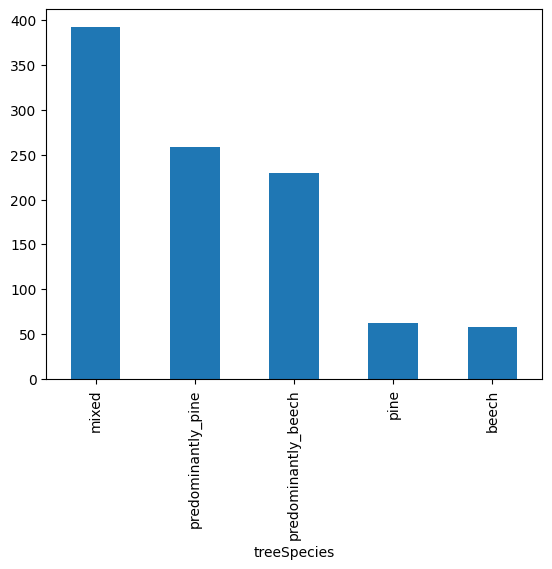

In [19]:
df['treeSpecies'].value_counts().plot(kind='bar');
# add x axis, y axis, legend, title 

### Value Distribution

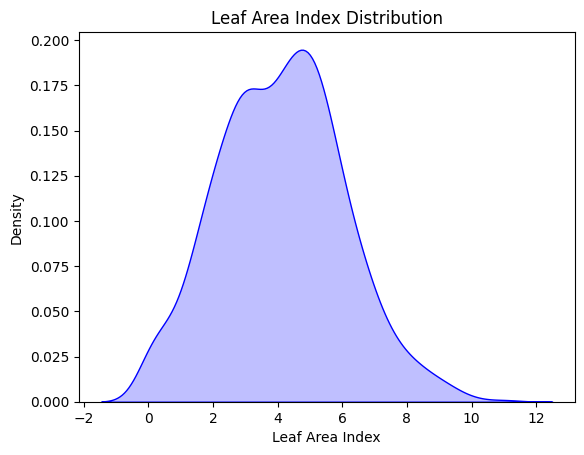

<Figure size 640x480 with 0 Axes>

In [28]:
# Assuming 'leaf area index' is a column in your DataFrame
sns.kdeplot(df['lai'], fill=True, color='blue', label='Density Plot')

# Add labels and title
plt.xlabel('Leaf Area Index')
plt.ylabel('Density')
plt.title('Leaf Area Index Distribution')

# Show the plot
plt.show()


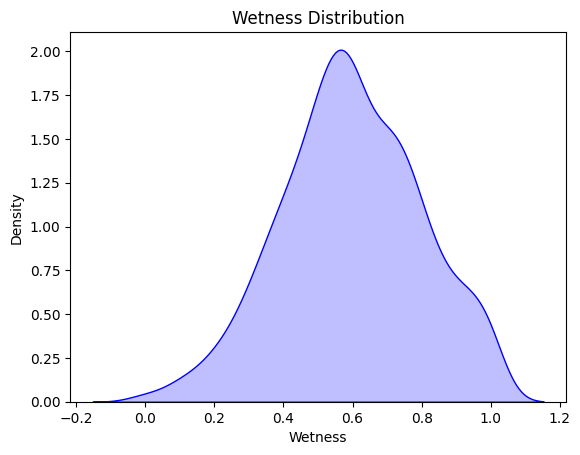

In [29]:
# Assuming 'leaf area index' is a column in your DataFrame
sns.kdeplot(df['wetness'], fill=True, color='blue', label='Density Plot')

# Add labels and title
plt.xlabel('Wetness')
plt.ylabel('Density')
plt.title('Wetness Distribution')

# Show the plot
plt.show()

/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/918219794.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treeSpecies'] == species]['lai'], label=species, shade=True)
/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/918219794.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treeSpecies'] == species]['lai'], label=species, shade=True)
/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/918219794.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treeSpecies'] == species]['lai'], label=species, shade=True)
/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn

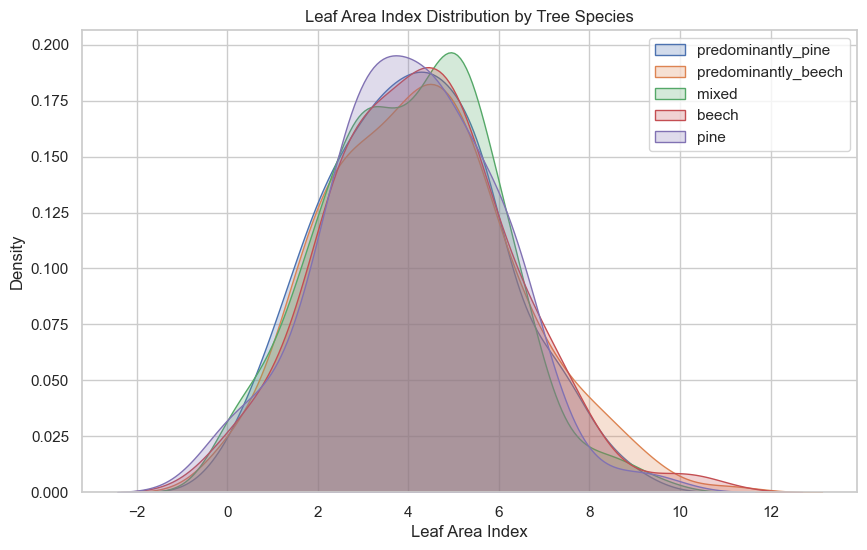

In [31]:
# Assuming 'leaf area index' and 'treeSpecies' are columns in your DataFrame
sns.set(style="whitegrid")

# Create a separate density plot for each tree species
plt.figure(figsize=(10, 6))
for species in df['treeSpecies'].unique():
    sns.kdeplot(df[df['treeSpecies'] == species]['lai'], label=species, shade=True)

# Add labels and title
plt.xlabel('Leaf Area Index')
plt.ylabel('Density')
plt.title('Leaf Area Index Distribution by Tree Species')

# Show legend
plt.legend()

# Show the plot
plt.show()


/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/1382921487.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treeSpecies'] == species]['wetness'], label=species, shade=True)
/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/1382921487.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treeSpecies'] == species]['wetness'], label=species, shade=True)
/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/1382921487.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treeSpecies'] == species]['wetness'], label=species, shade=True)
/var/folders/_0/xn8dpj7178qghd3

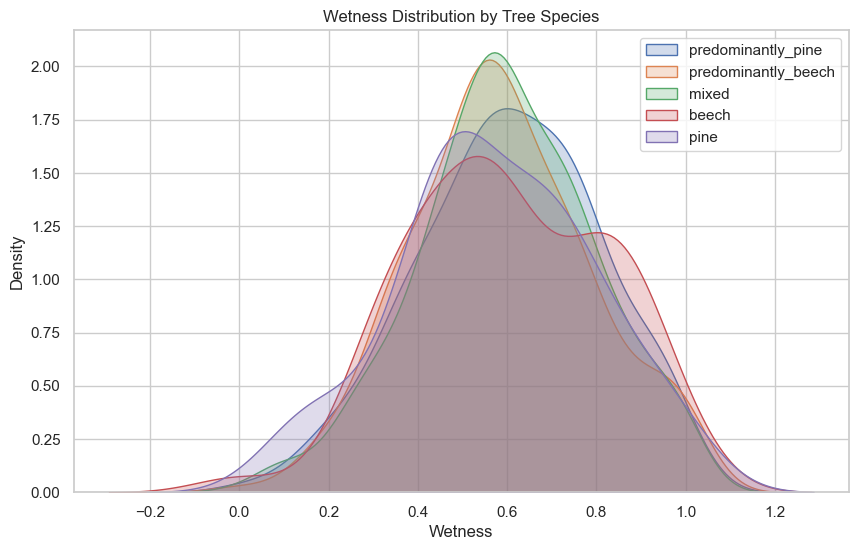

In [34]:
# Assuming 'leaf area index' and 'treeSpecies' are columns in your DataFrame
sns.set(style="whitegrid")

# Create a separate density plot for each tree species
plt.figure(figsize=(10, 6))
for species in df['treeSpecies'].unique():
    sns.kdeplot(df[df['treeSpecies'] == species]['wetness'], label=species, shade=True)

# Add labels and title
plt.xlabel('Wetness')
plt.ylabel('Density')
plt.title('Wetness Distribution by Tree Species')

# Show legend
plt.legend()

# Show the plot
plt.show()

/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/1660208417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='treeSpecies', y='lai', data=df, palette='Set3')


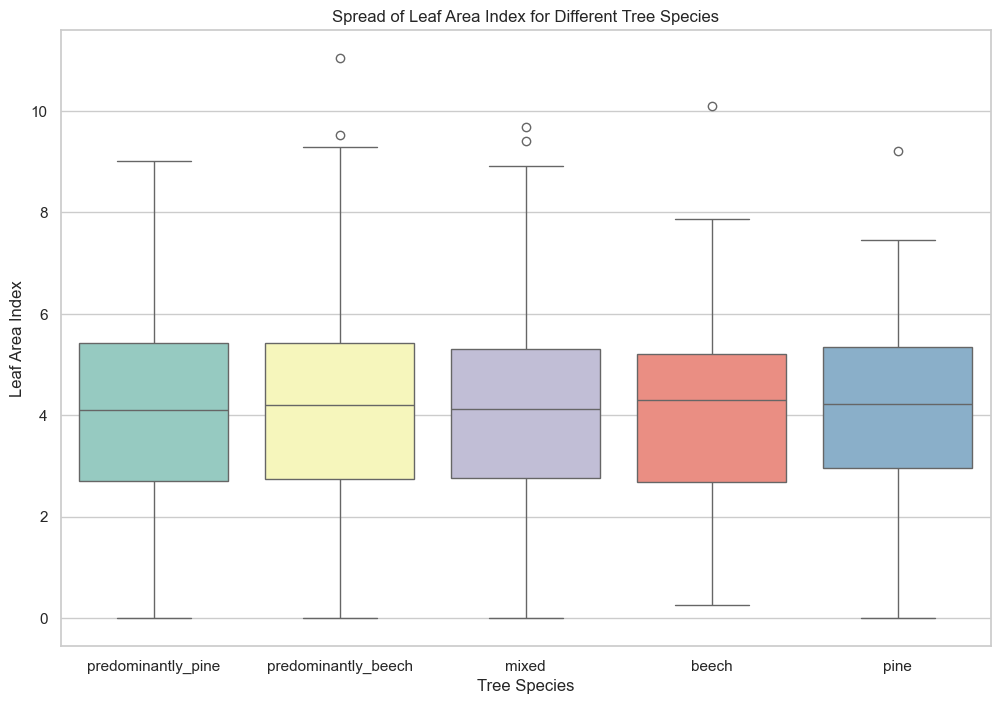

In [35]:
# Create a box plot for the spread of 'leaf area index' for different tree species
plt.figure(figsize=(12, 8))
sns.boxplot(x='treeSpecies', y='lai', data=df, palette='Set3')

# Add labels and title
plt.xlabel('Tree Species')
plt.ylabel('Leaf Area Index')
plt.title('Spread of Leaf Area Index for Different Tree Species')

# Show the plot
plt.show()


/var/folders/_0/xn8dpj7178qghd3ktk6ywh500000gn/T/ipykernel_6174/243872327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='treeSpecies', y='wetness', data=df, palette='viridis')


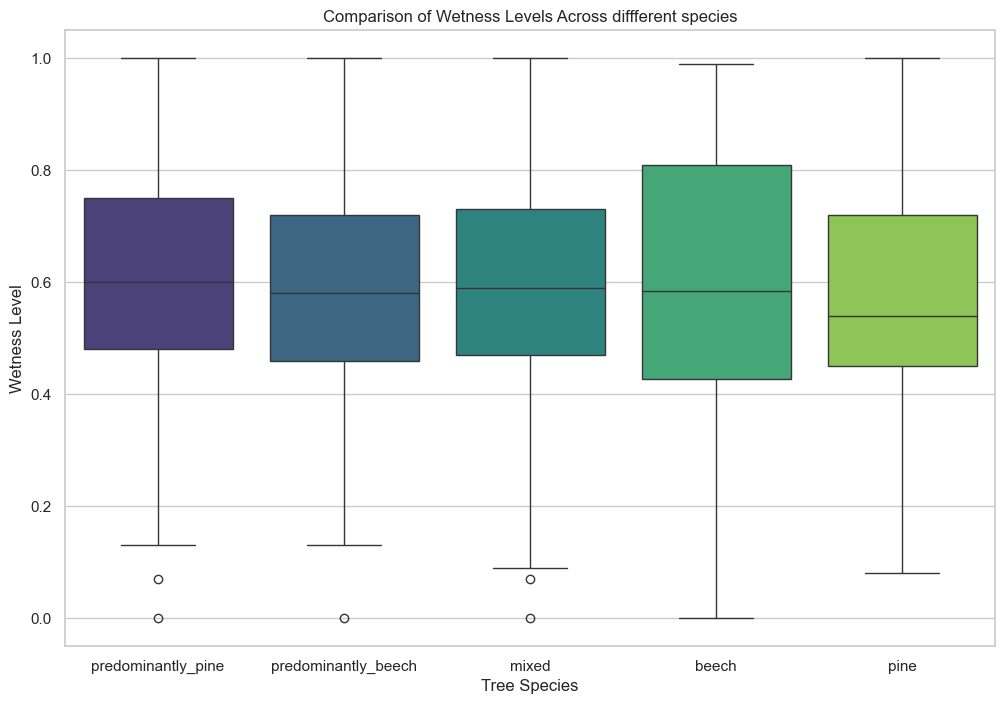

In [38]:
# Create a box plot for wetness levels across different classes of forests
plt.figure(figsize=(12, 8))
sns.boxplot(x='treeSpecies', y='wetness', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Tree Species')
plt.ylabel('Wetness Level')
plt.title('Comparison of Wetness Levels Across diffferent species')

# Show the plot
plt.show()


In [56]:
Sentinel_2A_values.values

array(['Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       'Sentinel_2A_864.7', 'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4'],
      dtype=object)

In [52]:
columns_of_interest = ['lai', 'wetness']

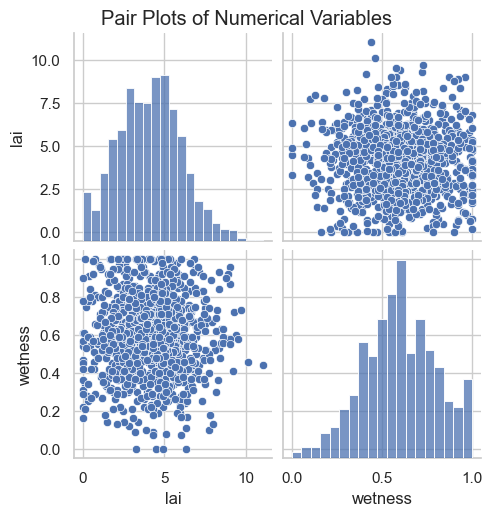

In [53]:
# Create pair plots
sns.pairplot(df[columns_of_interest])

# Add title
plt.suptitle('Pair Plots of Numerical Variables', y=1.02)

# Show the plot
plt.show()

### Green light reflections

### Relationship between different bands

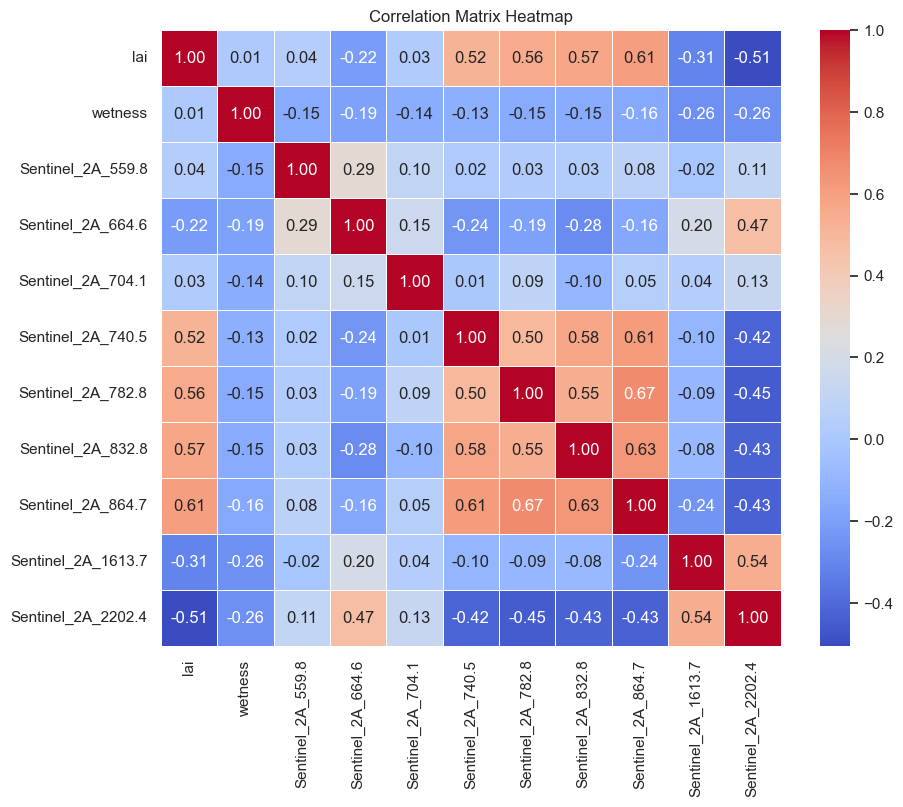

In [57]:
# Assuming your DataFrame is named df and contains numerical columns
numerical_columns = ['lai', 'wetness','Sentinel_2A_559.8', 'Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       'Sentinel_2A_864.7', 'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations and color bar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [60]:
wavelengths

Index(['w400', 'w401', 'w402', 'w403', 'w404', 'w405', 'w406', 'w407', 'w408',
       'w409',
       ...
       'w2491', 'w2492', 'w2493', 'w2494', 'w2495', 'w2496', 'w2497', 'w2498',
       'w2499', 'w2500'],
      dtype='object', length=2101)

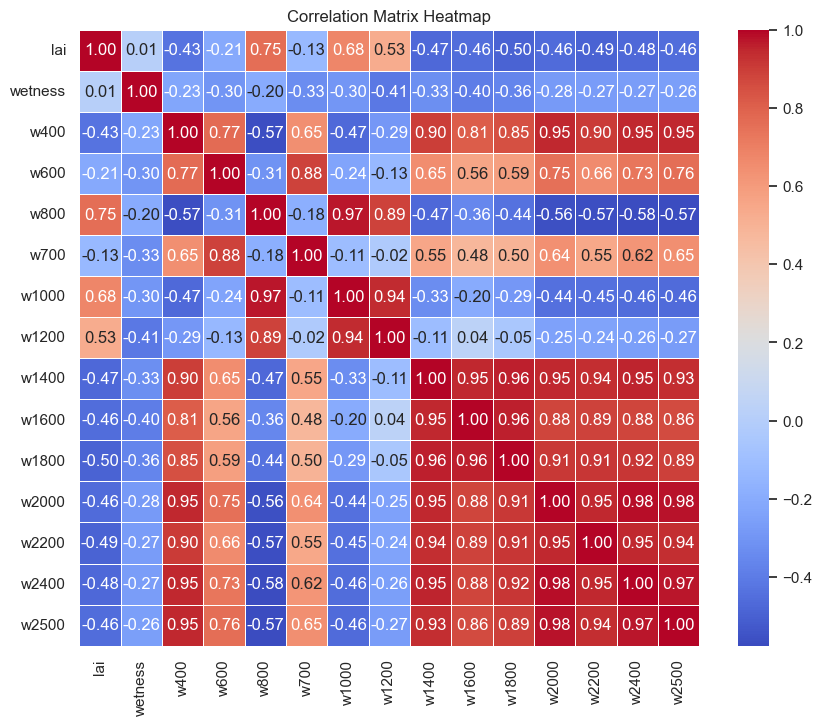

In [63]:
# Assuming your DataFrame is named df and contains numerical columns
numerical_columns = ['lai', 'wetness','w400','w600','w800','w700','w1000','w1200','w1400','w1600','w1800','w2000','w2200','w2400','w2500']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations and color bar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

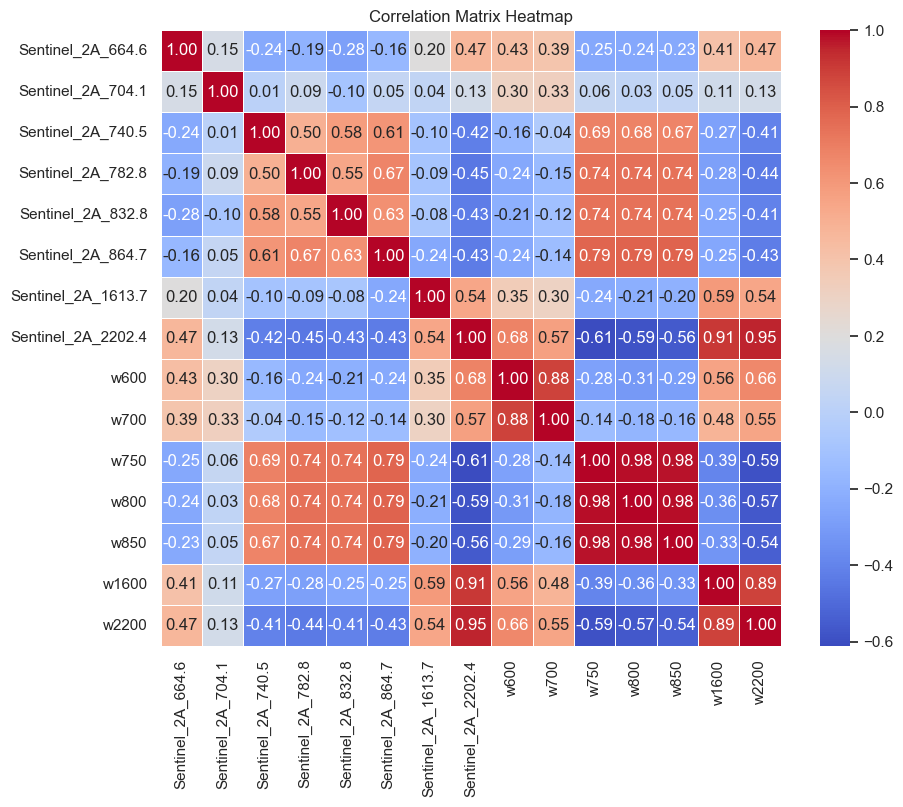

In [68]:
# Assuming your DataFrame is named df and contains numerical columns
numerical_columns = ['Sentinel_2A_664.6', 'Sentinel_2A_704.1',
       'Sentinel_2A_740.5', 'Sentinel_2A_782.8', 'Sentinel_2A_832.8',
       'Sentinel_2A_864.7', 'Sentinel_2A_1613.7', 'Sentinel_2A_2202.4','w600','w700','w750','w800','w850','w1600','w2200']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations and color bar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

### Visualise the reflected light bands

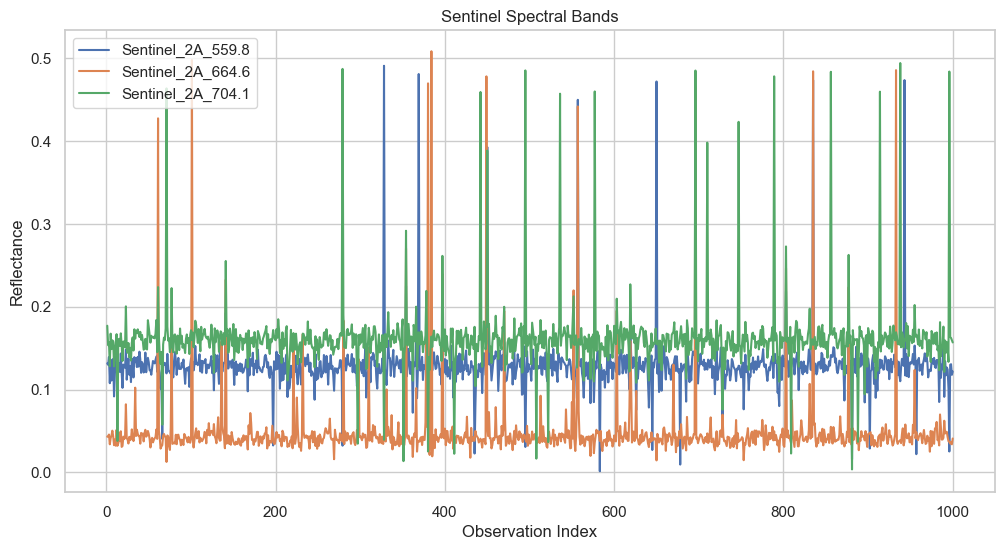

In [75]:
# Assuming Sentinel columns are named Sentinel_2A_A, Sentinel_2A_B, etc.
sentinel_columns = Sentinel_2A_values[:3]
# Plot the spectral bands
plt.figure(figsize=(12, 6))

for column in sentinel_columns:
    sns.lineplot(data=df, x=df.index, y=column, label=column)

# Add labels and title
plt.xlabel('Observation Index')
plt.ylabel('Reflectance')
plt.title('Sentinel Spectral Bands')

# Show legend
plt.legend()

# Show the plot
plt.show()


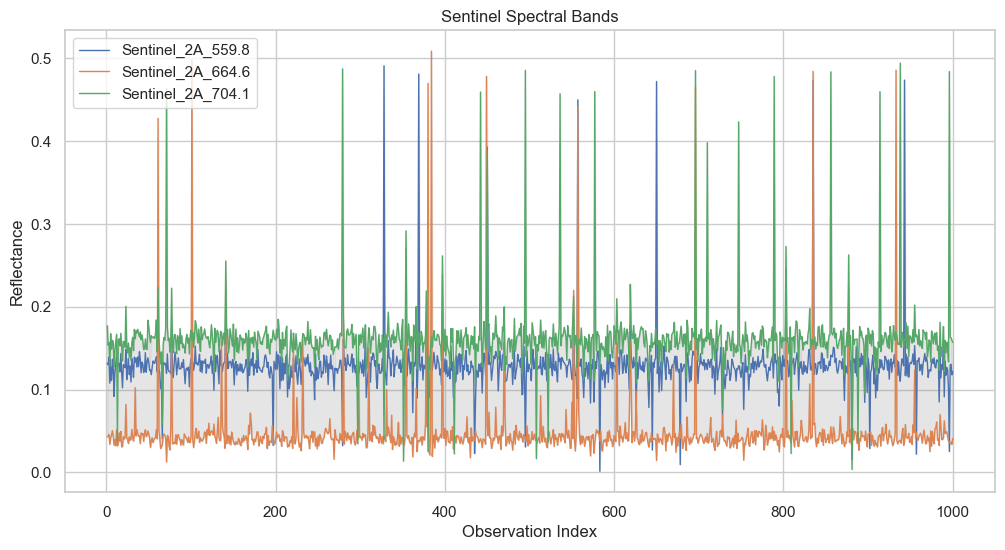

In [76]:
# Plot the spectral bands as an area plot
plt.figure(figsize=(12, 6))

for column in sentinel_columns:
    sns.lineplot(data=df, x=df.index, y=column, label=column, linewidth=1)

# Add labels and title
plt.xlabel('Observation Index')
plt.ylabel('Reflectance')
plt.title('Sentinel Spectral Bands')

# Show legend
plt.legend()

# Show the plot
plt.fill_between(df.index, df[sentinel_columns].min(axis=1), df[sentinel_columns].max(axis=1), alpha=0.2, color='gray')
plt.show()


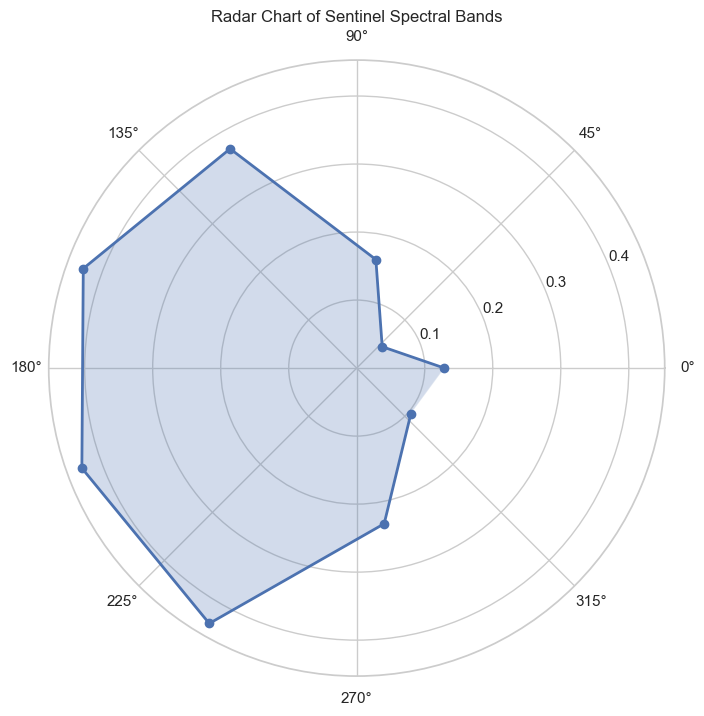

In [79]:
import numpy as np

sentinel_columns = Sentinel_2A_values
angles = np.linspace(0, 2 * np.pi, len(sentinel_columns), endpoint=False)
values = df[sentinel_columns].mean(axis=0)

plt.figure(figsize=(8, 8))
plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.title('Radar Chart of Sentinel Spectral Bands')
plt.show()


In [ ]:
# from pandas.plotting import parallel_coordinates

# df_normalized = (df[sentinel_columns] - df[sentinel_columns].min()) / (df[sentinel_columns].max() - df[sentinel_columns].min())

# plt.figure(figsize=(12, 6))
# parallel_coordinates(df_normalized,, 'class' colormap='viridis')
# plt.title('Parallel Coordinates Plot of Sentinel Spectral Bands')
# plt.show()


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# for column in sentinel_columns:
#     ax.plot(df.index, df[column], zs=column, label=column)

# ax.set_xlabel('Observation Index')
# ax.set_ylabel('Reflectance')
# ax.set_zlabel('Sentinel Spectral Bands')
# ax.set_title('3D Surface Plot of Sentinel Spectral Bands')
# plt.legend()
# plt.show()
